# Street Colouring with OSMnx
This was inspired by previous work by Erin Davis and Cedric Scherer.

* [The beautiful hidden logic of cities](https://erdavis.com/2019/07/27/the-beautiful-hidden-logic-of-cities/)
* [#Berlin road network by name/suffix forming colorful networks](https://twitter.com/CedScherer/status/1195420409434382336)
* [Erin's code](https://github.com/erdavis1/RoadColors)
* [Cedric's code](https://github.com/Z3tt/30DayMapChallenge)

Their code is very interesting in that it shows how to manipulate shapefiles in R in order to extract the data and chart. However, R is not my first language (I speak Python slightly better), and I'm a notorious big fan of OSMnx, so I wanted to see if this could be replicated with my favourite set of tools.

**TL;DR**: it can, and it only takes a few lines of code.

For comparison and reference, Cedric's version is the one I aimed to replicate directly:
![Berlin](images/BERLINORIGINAL.png)


In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
%matplotlib inline
ox.config(log_console=True, use_cache=True)

# Colouring
All I do here:
* define a set of colours in a function
* use that function to generate an array of colours while enumerating the "edges" (roads or parts of roads)

Note the caveat on how to query Nominatim (OpenStreetMap search engine) for the location. The result must be a POLYGON or POLYLINE. If a POINT is returned, you'd better check for multiple results and selecting one that isn't.

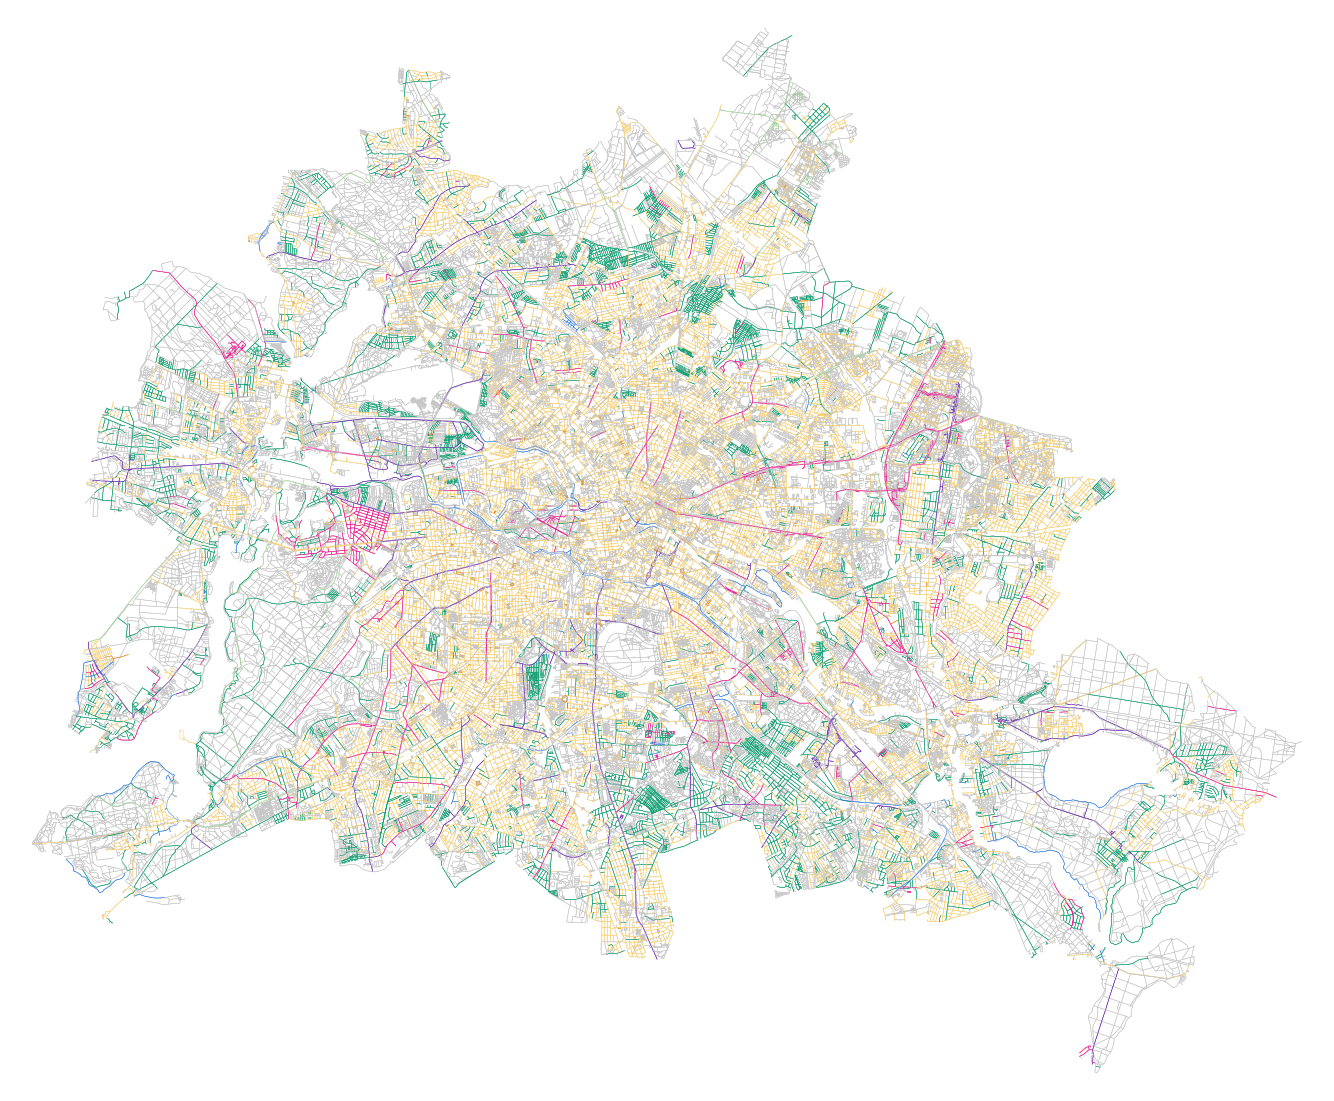

In [3]:
# This function takes the road name and a 3-letter code for the language and it returns the colour
def colourcode(x, language):
    if (language=='GER'):
        if ('straße' in x): 
            return '#f6cf71'
        elif ('weg' in x):
            return '#019868'
        elif ('allee' in x):
            return '#ec0b88'
        elif ('damm' in x):
            return '#651eac'
        elif ('platz' in x):
            return '#e18a1e'
        elif ('chaussee' in x):
            return '#9dd292'
        elif ('see' in x):
            return '#2b7de5'
        elif ('ufer' in x):
            return '#2b7de5'
        elif ('steg' in x):
            return '#2b7de5'
        else:
            return '#c6c6c6'
    elif (language=='ENG'):
        if ('road' in x): 
            return '#019868'
        elif ('street' in x):
            return '#f6cf71'
        elif ('way' in x):
            return '#ec0b88'
        elif ('avenue' in x):
            return '#651eac'
        elif ('drive' in x):
            return '#e18a1e'
        elif ('lane' in x):
            return '#9dd292'
        else:
            return '#c6c6c6'
    elif (language=='FRA'):
        if ('rue' in x): 
            return '#019868'
        elif ('place' in x):
            return '#f6cf71'
        elif ('avenue' in x):
            return '#ec0b88'
        elif ('boulevard' in x):
            return '#651eac'
        elif ('passage' in x):
            return '#e18a1e'
        elif ('pont' in x):
            return '#9dd292'
        elif ('quai' in x):
            return '#2b7de5'
        else:
            return '#c6c6c6'
    else:
        return 'black'

# Set place and language; the place is basically a Nominatim query. It must return a POLYGON/POLYLINE, not a POINT, so you might have to play with it a little, or set which_result below accordingly    
place='Berlin, Germany'
language='GER'

# note the which_result parameter, as per comment above
G = ox.graph_from_place(place, network_type='all', which_result=2) 

# For the colouring, we take the attributes from each edge found extract the road name, and use the function above to create the colour array
edge_attributes = ox.graph_to_gdfs(G, nodes=False)
ec = [colourcode(str(row['name']).lower(), language) for index, row in edge_attributes.iterrows()]

# We can finally draw the plot
fig, ax = ox.plot_graph(G, bgcolor='white', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=0.5, edge_alpha=1, fig_height=20, dpi=300)

In [5]:
# Appendix 
# Are you curious about other feature of the streets? With this piece of code, you can see what other elements you could colour..

edge_attributes = ox.graph_to_gdfs(G, nodes=False)
edge_attributes.head() 

,u,v,key,osmid,highway,tunnel,oneway,length,geometry,maxspeed,...,ref,lanes,service,access,width,junction,bridge,area,est_width,version
0,2777153538,4934187007,0,272795487,footway,yes,False,2.432,"LINESTRING (13.41379 52.52163, 13.41381 52.52161)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2777153538,4397315896,0,272795487,footway,yes,False,4.313,"LINESTRING (13.41379 52.52163, 13.41375 52.52166)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2777153538,3810179832,0,"[272795504, 272795492, 377634143]","[steps, footway]",yes,False,19.835,"LINESTRING (13.41379 52.52163, 13.41379 52.521...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4585422851,4585422855,0,463255850,footway,NaN,False,0.649,"LINESTRING (13.28633 52.53663, 13.28634 52.53663)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4585422851,6770391035,0,"[463255848, 463255857, 463255859, 463255860]","[steps, footway]",NaN,False,24.894,"LINESTRING (13.28633 52.53663, 13.28634 52.536...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
